# Bias-Variance Trade-Off

## Introduction

You've seen how you can extend your linear models by including interaction effects as well as polynomial terms. Including these in models comes at a price though: not only do our models become more complex (with more parameter estimates), adding more terms can potentially harm model performance when performing predictions. You'll learn about that in this lesson.

## Objectives

You will be able to:
- Understand what the bias/variance trade-off is
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Using models for prediction

You have learned earlier how to use regression models for predictions. This is without any doubt one of the main reasons why regressions models are used. 

When building models for predicting, we have previously seen how we need to create a train test split in order to keep ourselves honest in tuning our model to the data itself. Not doing this can lead to dramatic results. Let's reuse the "Yield" data set used in the polynomial regression section (the data was slightly altered, but very similar to what we've seen before). Let's visualize the whole data set.

Text(0, 0.5, 'Yield')

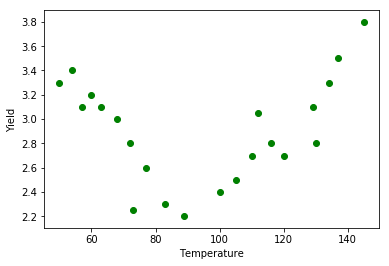

In [1]:
import pandas as pd
yld = pd.read_csv("yield2.csv", sep='\s+', index_col = 0)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

yld.head()
y = yld["Yield"]
X = yld["Temp"]

type(X)

#X.dtype
plt.scatter(X,y, color = "green")
plt.xlabel("Temperature")
plt.ylabel("Yield")

There seems to be a downward trend first, then upwards. Let's split this dataset up in a training set, containing 70% of the cases, and a test set, containing 30% of the cases. 

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)

df_train = pd.concat([X_train, y_train], axis=1, ignore_index=True)
data_train = df_train.sort_values([0])
reg = LinearRegression().fit(data_train[0].values.reshape(-1, 1), data_train[1])

df_test = pd.concat([X_test, y_test], axis=1, ignore_index=True)
data_test = df_test.sort_values([0])

When plotting a simple linear regression model there are no unexpected results: the line is a bad fit, both for training and test set.

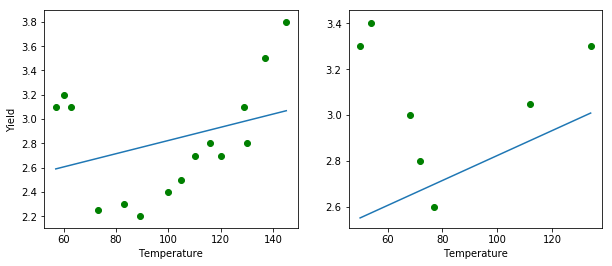

In [3]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(data_train[0], data_train[1], color = "green")
plt.plot(data_train[0].values.reshape(-1, 1), reg.predict(data_train[0].values.reshape(-1, 1)))
plt.xlabel("Temperature")
plt.ylabel("Yield")

plt.subplot(1, 2, 2)
plt.scatter(data_test[0], data_test[1], color = "green")
plt.plot(data_test[0].values.reshape(-1, 1), reg.predict(data_test[0].values.reshape(-1, 1)))
plt.xlabel("Temperature");

When including polynomials, however, the result changes. We included a polynomial of 6 here. Where the result seems to be very accurate for the training set, the picture is definitely different for the test set on the right hand side. Where the fit seemed to be good for the training set, the test set fit is not nearly as good. The problem is that our model did *not generalize well* to cases outside the training set.

In [4]:
# create polynomial fit when training and test set
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
df_train = pd.concat([X_train, y_train], axis=1, ignore_index=True)
data_train = df_train.sort_values([0])

poly = PolynomialFeatures(6)  # 2 vs 5
X_fin = poly.fit_transform(data_train[0].values.reshape(-1, 1))
reg_poly = LinearRegression().fit(X_fin, data_train[1])

df_test = pd.concat([X_test, y_test], axis=1, ignore_index=True)
data_test = df_test.sort_values([0])

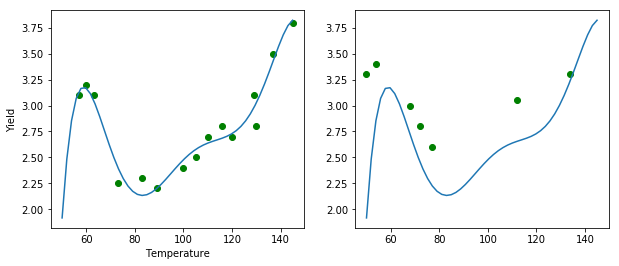

In [5]:
# plot polynomial fit
X_linspace = pd.DataFrame(np.linspace(50,145,50), columns = ["Temp"])
X_linspace_fin = poly.fit_transform(X_linspace)

y_poly_pred = reg_poly.predict(X_linspace_fin)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(data_train[0], data_train[1], color = "green")
plt.plot(X_linspace,y_poly_pred)
plt.xlabel("Temperature")
plt.ylabel("Yield")

plt.subplot(1, 2, 2)
plt.scatter(data_test[0], data_test[1], color = "green")
plt.plot(X_linspace,y_poly_pred);

## Underfitting and Overfitting

Let's formalize this:


> *Underfitting* happens when a model cannot model the training data, nor can it generalize to new data.

Our simple linear regression model fitter earlier was an underfitted model.

> *Overfitting* happens when a model models the training data too well. In fact, so well that it is not generalizeable

Our 6-degree polynomial was overfitted. Let's have a look at the mean squared error:


In [6]:
from sklearn.metrics import mean_squared_error

X_fin_test = poly.fit_transform(data_test[0].values.reshape(-1, 1))
y_pred = reg_poly.predict(X_fin_test)
mean_squared_error(y_test, y_pred)

0.4544755356269734

Now, let's have a look at the same plots but with second degree polynomial.

0.3039736985816992

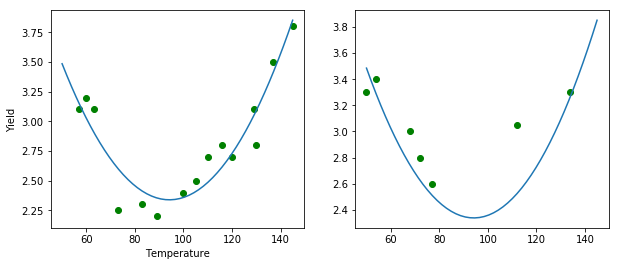

In [7]:
# create polynomial fit when training and test set
df_train = pd.concat([X_train, y_train], axis=1, ignore_index=True)
data_train = df_train.sort_values([0])

poly = PolynomialFeatures(2)  # 2 vs 5
X_fin = poly.fit_transform(data_train[0].values.reshape(-1, 1))
reg_poly = LinearRegression().fit(X_fin, data_train[1])

df_test = pd.concat([X_test, y_test], axis=1, ignore_index=True)
data_test = df_test.sort_values([0])

# plot polynomial fit
X_linspace = pd.DataFrame(np.linspace(50,145,50), columns = ["Temp"])
X_linspace_fin = poly.fit_transform(X_linspace)

y_poly_pred = reg_poly.predict(X_linspace_fin)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(data_train[0], data_train[1], color = "green")
plt.plot(X_linspace,y_poly_pred)
plt.xlabel("Temperature")
plt.ylabel("Yield")

plt.subplot(1, 2, 2)
plt.scatter(data_test[0], data_test[1], color = "green")
plt.plot(X_linspace,y_poly_pred);

X_fin_test = poly.fit_transform(data_test[0].values.reshape(-1, 1))
y_pred = reg_poly.predict(X_fin_test)
mean_squared_error(y_test, y_pred)

The fit for the training set became worse, but we can clearly see how the test set performance improved by looking at the mean squared error. Also, it seems like the results for training and test set are comparable, which is what you would want in general.

## Bias variance trade-off

Another perspective on this problem of overfitting versus underfitting is the bias variance tradeoff. The idea is that We can decompose the Mean Squared Error as the sum of 
- *bias*
- *variance*, and
- *irreducible error*:

Formally, this is written as: 
$ MSE = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$. The derivation of this result can be found on the wikipedia page of the bias-variance trade-off, [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

<img src="./images/bias_variance.png" alt="Drawing" style="width: 500px;"/>

- The bias arises when wrong assumptions are made when training a model. For example, an interaction effect is missed, or we didn't catch a certain polynomial relationship. Because of this, our algorithm to miss the relevant relations between predictors and target variable. Note how this is similar to underfitting!

- The variance arises  when a model is too sensitive to small fluctuations in the training set. When variance is high, random noise in the training data is modeled, rather than the intended outputs. This is overfitting!

The balance between bias and variance is a trade-off. We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. Bias is usually associated with low model complexity, variance with high model complexity. There is generally a "sweet spot" in between, compromising between bias and variance. Read the additional resource below for more insights!

## Additional resources

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

## Summary

Great, now you know what bias-variance trade-off is, what underfitting and overfitting is, and how all of these relate, let's dive in for some practice!